In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()    # dont forget this
        self.fc1 = nn.Linear(28*28, 64)    #(input, output) of this fully connected layer
        self.fc2 = nn.Linear(64, 64)       # input of this layer is the output of last layer
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)       # output 10: 10 labels
   
    def forward(self, x):
        x = F.relu(self.fc1(x))    # pass data x thourgh all layers with ReLu activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
# create a random data and pass it through our neural network
X = torch.rand((28,28))

# flatten the image, para:-1 means, you know how many column you need 
# but dont know how many rows you need, just let torch compute it for you
X = X.view(-1, 28*28)

# pass data into network and get output
output = net(X)
output    #output: prediction on classes

tensor([[-2.1994, -2.3821, -2.3116, -2.3516, -2.3848, -2.2500, -2.3589, -2.1935,
         -2.3345, -2.2825]], grad_fn=<LogSoftmaxBackward>)

In [22]:
import torch.optim as optim
from torchvision import transforms, datasets 

train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.Compose([transforms.ToTensor()])]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.Compose([transforms.ToTensor()])])) 
trainset =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True )

# optimizer: adjust parameters at every step
# net.parameters(), adjustable paramters in the network
optimizer = optim.Adam(net.parameters(), lr = 0.001)

# epoch is the number of passes through the entire training set
EPOCHS = 10

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()    # clears old gradients from the last step
        output = net(X.view(-1, 28*28))    #pass the data into network
        loss = F.nll_loss(output, y)
        loss.backward()    # computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.
        optimizer.step()   #  causes the optimizer to take a step based on the gradients of the parameters.
    print(loss)    #print the loss of each epoch
        

tensor(0.0098, grad_fn=<NllLossBackward>)
tensor(0.0466, grad_fn=<NllLossBackward>)
tensor(3.1352e-06, grad_fn=<NllLossBackward>)
tensor(0.0035, grad_fn=<NllLossBackward>)
tensor(2.9966e-05, grad_fn=<NllLossBackward>)
tensor(0.0023, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.4495, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)


In [25]:
correct = 0
total = 0

# we dont want to calculate gradient here
with torch.no_grad():
        for data in trainset:
            X, y = data
            output = net(X.view(-1, 28*28))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1
print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.987


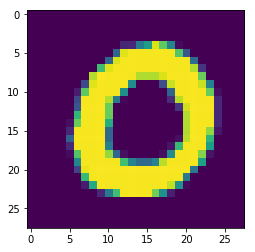

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))    # show one of the images
plt.show()

In [31]:
# see if the prediction is right for the image above
print(torch.argmax(net(X[1].view(-1,28*28))[0]))

tensor(0)
